In [1]:
import pandas as pd
import numpy as np
import torch
from pathlib import Path
import json
import os
import collections
import re 
from imageio import imread, imwrite
from multiprocessing import Pool
import matplotlib.pyplot as plt
import cv2
from scipy import linalg
#import matplotlib.pyplot as plt

/usrhomes/g013/anaconda3/envs/myenv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## FSD METRICS

In [10]:
def class_dist(mean_values_r,mean_values_g=None,save_loc=None,title=None):
    fig = plt.figure()
    x = np.arange(len(mean_values_r))
    x_labels=["Void","Road","S.Walk","Building","Wall","Fence","Pole","Tr.Light","Tr.Sign","Veget.","Sky",
    "Person","Rider","Car","O.Vehicles","Bikes"]
    ax=fig.add_axes([0,0,1,1])
    ax.bar(x,mean_values_r,color='b',width=0.25)
    if not mean_values_g is None:    
        ax.bar(x+0.25,mean_values_g,color='g',width=0.25)
    ax.legend(["Real (First) ","Generated (Second)"])
    ax.set_xticks(x)
    ax.set_xticklabels(x_labels,rotation=45,ha="right")
    ax.set_title(title)

    if not save_loc is None:
        fig.savefig(save_loc,bbox_inches="tight")
  


In [35]:
real_cond = np.load("../real_dataset_cond_old.npy")
generated_cond=np.load("../generated_cond.npy")

m1 = np.mean(real_cond, axis=0)
s1 = np.cov(real_cond, rowvar=False)

m2 = np.mean(generated_cond, axis=0)
s2 = np.cov(generated_cond, rowvar=False)

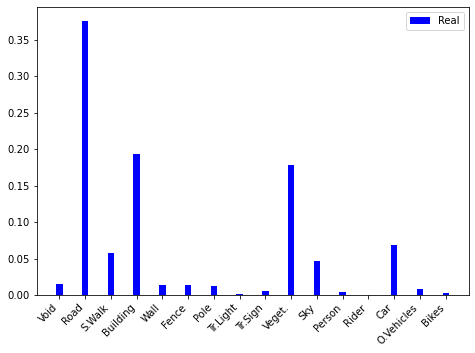

In [10]:
class_dist(m1)

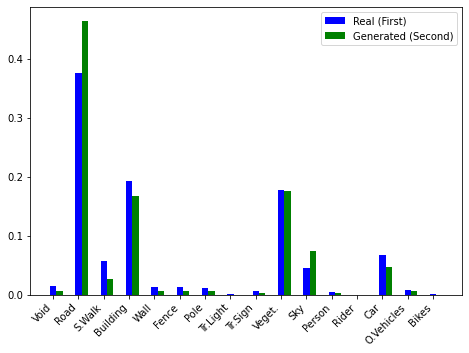

In [36]:
#v3.13
save_loc="./data/class_distribution_graph_5kcity.png"
class_dist(m1,m2,save_loc)

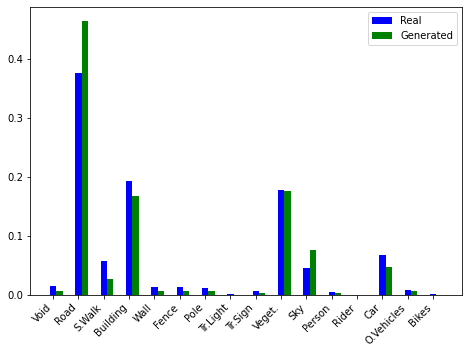

In [6]:
#v3.11
save_loc="./data/class_distribution_graph_5kcity.png"
class_dist(m1,m2,save_loc)


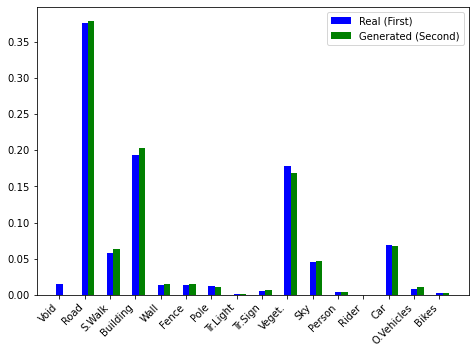

In [11]:
real_cond = np.load("../real_dataset_cond_old.npy")
generated_cond=np.load("../real_dataset_cond_5k.npy")

m1 = np.mean(real_cond, axis=0)
s1 = np.cov(real_cond, rowvar=False)

m2 = np.mean(generated_cond, axis=0)
s2 = np.cov(generated_cond, rowvar=False)

class_dist(m1,m2)


In [30]:
## KL Divergence

In [32]:
real_cond.shape

(23474, 16)

In [34]:
real_cond = np.load("../real_dataset_cond_old.npy")
generated_cond=np.load("../generated_cond.npy")

m1 = np.mean(real_cond, axis=0)

m2 = np.mean(generated_cond, axis=0)
m1_t = torch.tensor(m1).unsqueeze(0)
m2_t=torch.tensor(m2).unsqueeze(0)
kl_divergence(m1_t, m2_t)

tensor(0.0545)

### Final Metrics table

In [6]:
metrics = ["Model","FID_50k","FID*","FSD_50k","Test MIoU-33","Test MIoU-16","KID"] #TODO: Include Train MIoU
metrics_df =  pd.DataFrame(columns=metrics)
## Model_{trained_on}_vs_{generated_samples}
sem_pal_3k = {"Model":"SP_3k","FID*":61.04,"FID_50k":38.4,"FSD_50k":24.2,"KID":"__","Test MIoU-33":34,"Test MIoU-16":22}

sem_pal_25k = {"Model":"SP_25k","FID*":52.5,"FID_50k":25.8,"FSD_50k":19.5,"KID":"__","Test MIoU-33":"__","Test MIoU-16":"__"}

##SSG chosen is v3.13 ckpt 140k
ssg_25k = {"Model":"SSG_25k","FID*":"__","FID_50k":9.8,"FSD_50k":155,"KID":22,"Test MIoU-33":"___","Test MIoU-16":30.7}
print(f"FID* is how SP calculated their FID(len(images seen) generated vs validation ), while FID 50k is 50k generated sample vs all images model have seen")
metrics_df.append([ssg_25k,sem_pal_3k,sem_pal_25k])

FID* is how SP calculated their FID(len(images seen) generated vs validation ), while FID 50k is 50k generated sample vs all images model have seen


/tmp/ipykernel_2939271/197478929.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df.append([ssg_25k,sem_pal_3k,sem_pal_25k])


,Model,FID_50k,FID*,FSD_50k,Test MIoU-33,Test MIoU-16,KID
0,SSG_25k,9.8,__,155.0,___,30.7,22
1,SP_3k,38.4,61.04,24.2,34,22,__
2,SP_25k,25.8,52.5,19.5,__,__,__
